In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
import pandas as pdJointNLUJointNLU
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
!pip install matplotlib==3.1.3

# FAQ

In [ ]:
data = pd.read_csv("..")
train_data, test_data, _, _ = train_test_split(data, data, test_size = 0.001)


data_path = "path"

f= open(data_path + "train/label","w+")
for i in range(train_data.shape[0]):
  f.write(str(train_data["label2"].iloc[i]) + "\n")
f.close()

f= open(data_path + "train/seq.in","w+")
for i in range(train_data.shape[0]):
  f.write(train_data["in"].iloc[i].replace("؟", "") + "\n")
f.close()

f= open(data_path + "train/seq.out","w+")
for i in range(train_data.shape[0]):
  f.write(train_data["out"].iloc[i] + "\n")
f.close()


f= open(data_path + "test/label","w+")
for i in range(test_data.shape[0]):
  f.write(str(train_data["label2"].iloc[i]) + "\n")
f.close()

f= open(data_path + "test/seq.in","w+")
for i in range(test_data.shape[0]):
  f.write(train_data["in"].iloc[i].replace("؟", "") + "\n")
f.close()

f= open( data_path + "test/seq.out","w+")
for i in range(test_data.shape[0]):
  f.write(train_data["out"].iloc[i] + "\n")
f.close()

In [ ]:
!git clone https://github.com/hyydrra/dialog-nlu.git
%cd dialog-nlu
!pip install .

In [ ]:
%tensorflow_version 2.x
from dialognlu import TransformerNLU, AutoNLU
from dialognlu.readers.goo_format_reader import Reader

# reading datasets

train_path = data_path + "train"
val_path = data_path + "test"
train_dataset = Reader.read(train_path)
val_dataset = Reader.read(val_path)

# configurations of the model
config = {
    "pretrained_model_name_or_path": "HooshvareLab/bert-fa-base-uncased",
    "from_pt": False,
}
nlu_model = TransformerNLU.from_config(config)


nlu_model.train(train_dataset, val_dataset, epochs=20, batch_size=16)

save_path = "/content/drive/MyDrive/DigiKala/FAQ/saved_models/bert2"
nlu_model.save(save_path)

In [ ]:
# save_path = "/content/drive/MyDrive/DigiKala/FAQ/saved_models/bert2"
# nlu_model = AutoNLU.load(save_path)

In [ ]:
question = "سوال شما "
out = nlu_model.predict(question)
print(out)
print(answers[int(out['intent']['name'])])

In [ ]:
anss = nlu_model.predict_intents(question, 10)
print(anss)
for ans in anss:
  print(answers[int(ans[0])])

# Plot output scores

In [ ]:
predictions = []
number_of_top_intents = 10
for i in range(data.shape[0]):
  if i%100 == 0:
    print(i)
  question = train_data["in"].iloc[i].replace("؟", "")
  anss = nlu_model.predict_intents(question, number_of_top_intents)
  predictions.append(anss)

## Scatter plot:

In [ ]:
predictions_probs = []
for pred in predictions:
  temp = []
  for x in pred:
    temp.append(x[1])
  predictions_probs.append(np.array(temp))

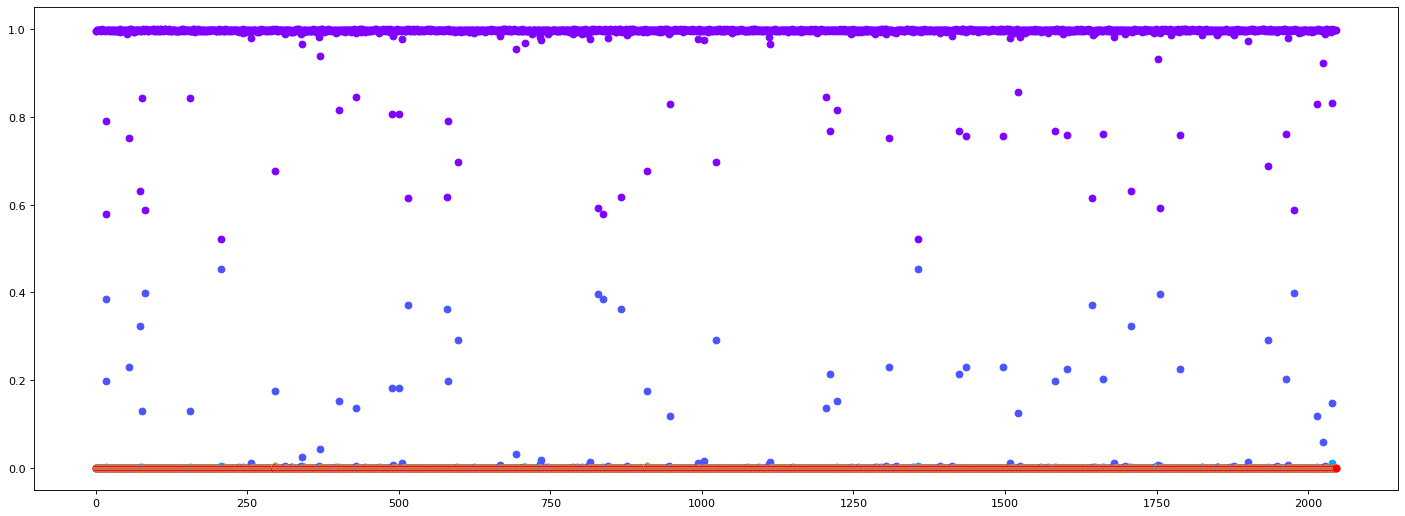

In [ ]:
figure(num=None, figsize=(22,8), dpi=80, facecolor='w', edgecolor='k')
colors = cm.rainbow(np.linspace(0, 1, 10))
for i in range(len(predictions_probs)):
  for j in range(10):
    plt.scatter(i, predictions_probs[i][j], color = colors[j])
plt.show()

## Bar plot:

In [ ]:
temp_dists = {}
for i in range(number_of_top_intents):
  temp_dists[i] = []


predictions_probs = []
for pred in predictions:
  for i in range(len(pred)):
    temp_dists[i].append(pred[i][1])


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly


fig = go.Figure()
for i in range(number_of_top_intents):
  fig.add_trace(go.Box(x=["Top " + str(i+1)]*10000, y=temp_dists[i], name = "Top " + str(i+1) ))
 
fig.update_layout(xaxis_title=".", yaxis_title="Scores",title="Boxplot for Top intents scores",title_x=0.5)
fig.show()

plotly.offline.plot(fig, filename = '/content/dists.html', auto_open=False)